# Ising Trotter Bloqs

Bloqs implementing Trotter steps for the 1D Ising model under periodic boundary conditions. 

The Ising model is given as
$$
H = -J\sum_{k=0}^{L-1}\sigma_{k}^{Z}\sigma_{(k+1)}^{Z} - \Gamma\sum_{k=0}^{L-1}\sigma_{k}^{X}
$$

where $J$ and $\Gamma$ are coupling parameters.

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `IsingXUnitary`
Implents the unitary $e^{-i \alpha H_X}$.

#### Parameters
 - `nsites`: The number of lattice sites.
 - `angle`: The angle of the rotation. $\alpha$ in the docstring.
 - `eps`: The tolerance for the rotation. 

#### Registers
 - `system`: The system register to apply the unitary to.


In [2]:
from qualtran.bloqs.chemistry.trotter.ising import IsingXUnitary

### Example Instances

In [3]:
nsites = 3
j_zz = 2
dt = 0.01
ising_x = IsingXUnitary(nsites=nsites, angle=2 * dt * j_zz)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([ising_x],
           ['`ising_x`'])

### Call Graph

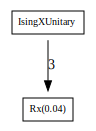

#### Counts totals:
 - `Rx(0.04)`: 3

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
ising_x_g, ising_x_sigma = ising_x.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(ising_x_g)
show_counts_sigma(ising_x_sigma)

## `IsingZZUnitary`
Implents the unitary $e^{-i \alpha H_{ZZ}}$.

#### Parameters
 - `nsites`: The number of lattice sites.
 - `angle`: The angle of the rotation. $\alpha$ in the docstring.
 - `eps`: The tolerance for the rotation. 

#### Registers
 - `system`: The system register to apply the unitary to.


In [6]:
from qualtran.bloqs.chemistry.trotter.ising.unitaries import IsingZZUnitary

### Example Instances

In [7]:
nsites = 3
j_zz = 2
dt = 0.01
ising_zz = IsingZZUnitary(nsites=nsites, angle=2 * dt * j_zz)

#### Graphical Signature

In [8]:
from qualtran.drawing import show_bloqs
show_bloqs([ising_zz],
           ['`ising_zz`'])

### Call Graph

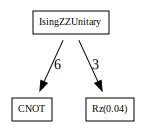

#### Counts totals:
 - `CNOT`: 6
 - `Rz(0.04)`: 3

In [9]:
from qualtran.resource_counting.generalizers import ignore_split_join
ising_zz_g, ising_zz_sigma = ising_zz.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(ising_zz_g)
show_counts_sigma(ising_zz_sigma)